In [5]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns
import ast

## The dataset import

In [7]:
# load dataset
df = pd.read_csv("movies_metadata.csv")
df.head()

/tmp/ipykernel_8190/4067216775.py:2: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("movies_metadata.csv")


,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",...,1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0
1,False,NaN,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",NaN,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,...,1995-12-15,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0
2,False,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",NaN,15602,tt0113228,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,...,1995-12-22,0.0,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,False,6.5,92.0
3,False,NaN,16000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,31357,tt0114885,en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",...,1995-12-22,81452156.0,127.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Friends are the people who let you be yourself...,Waiting to Exhale,False,6.1,34.0
4,False,"{'id': 96871, 'name': 'Father of the Bride Col...",0,"[{'id': 35, 'name': 'Comedy'}]",NaN,11862,tt0113041,en,Father of the Bride Part II,Just when George Banks has recovered from his ...,...,1995-02-10,76578911.0,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,False,5.7,173.0


## Data cleaning

### 1) Removing missing values

In [10]:
# Accurate columns
movies = df[['title', 'release_date', 'vote_average', 'vote_count', 'genres', 'runtime', 'revenue', 'budget']]

# COlumn with missing values
movies.isnull().sum()

title             6
release_date     87
vote_average      6
vote_count        6
genres            0
runtime         263
revenue           6
budget            0
dtype: int64

In [11]:
movies.shape

(45466, 8)

In [12]:
# removing rows with missing values
movies = movies.dropna()

# verification
movies.isnull().sum()

title           0
release_date    0
vote_average    0
vote_count      0
genres          0
runtime         0
revenue         0
budget          0
dtype: int64

In [13]:
movies.shape

(45130, 8)

### 2) Date conversion

In [15]:
# checking the data type of the dates
movies.release_date.dtype

dtype('O')

In [16]:
movies.release_date.head()

0    1995-10-30
1    1995-12-15
2    1995-12-22
3    1995-12-22
4    1995-02-10
Name: release_date, dtype: object

In [17]:
# converting it to date type
movies.release_date = pd.to_datetime(movies.release_date, errors='coerce')
movies.release_date.head()

0   1995-10-30
1   1995-12-15
2   1995-12-22
3   1995-12-22
4   1995-02-10
Name: release_date, dtype: datetime64[ns]

In [18]:
# extracting the year
movies['year'] = movies.release_date.dt.year

movies.head()

,title,release_date,vote_average,vote_count,genres,runtime,revenue,budget,year
0,Toy Story,1995-10-30,7.7,5415.0,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",81.0,373554033.0,30000000,1995
1,Jumanji,1995-12-15,6.9,2413.0,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",104.0,262797249.0,65000000,1995
2,Grumpier Old Men,1995-12-22,6.5,92.0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",101.0,0.0,0,1995
3,Waiting to Exhale,1995-12-22,6.1,34.0,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",127.0,81452156.0,16000000,1995
4,Father of the Bride Part II,1995-02-10,5.7,173.0,"[{'id': 35, 'name': 'Comedy'}]",106.0,76578911.0,0,1995


## Data visualization

### 1) Average ratings over time

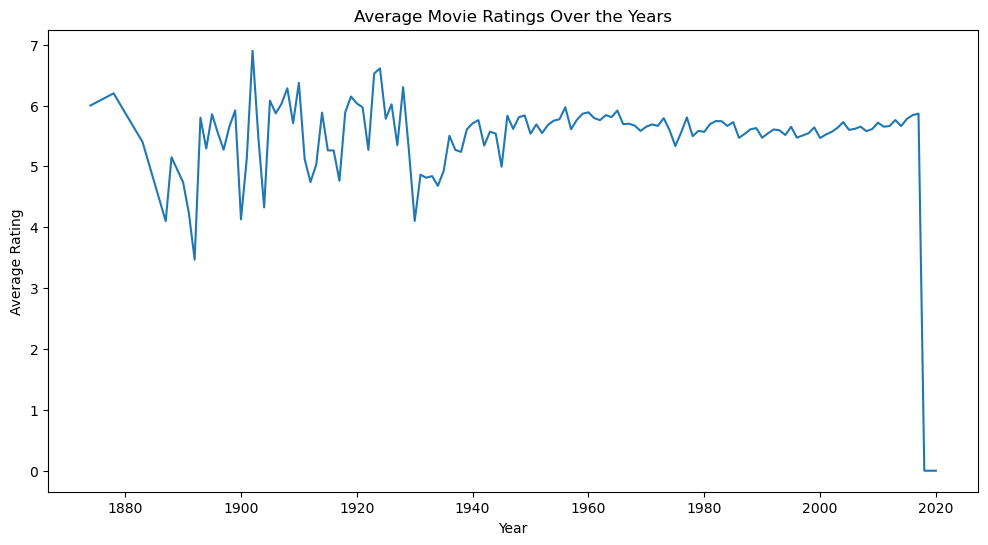

In [45]:
plt.figure(figsize=(12,6))
sns.lineplot(data=movies.groupby('year')['vote_average'].mean())
plt.title("Average Movie Ratings Over the Years")
plt.xlabel("Year")
plt.ylabel("Average Rating")
plt.show()

**Story** : Over time, the film industry has grown rapidly, especially from the **1980s onward**. This reflects both technological improvements (cheaper cameras, digital production) and new distribution channels (DVDs, streaming platforms).

**Conclusion** : More movies each year means **higher competition** for attention. Studios and streaming services need to focus more on **quality, marketing, and differentiation** rather than just volume.

### 2) Number of movies released per year

In [23]:
movies.year.describe()

count    45130.000000
mean      1991.853933
std         24.075597
min       1874.000000
25%       1978.000000
50%       2001.000000
75%       2010.000000
max       2020.000000
Name: year, dtype: float64

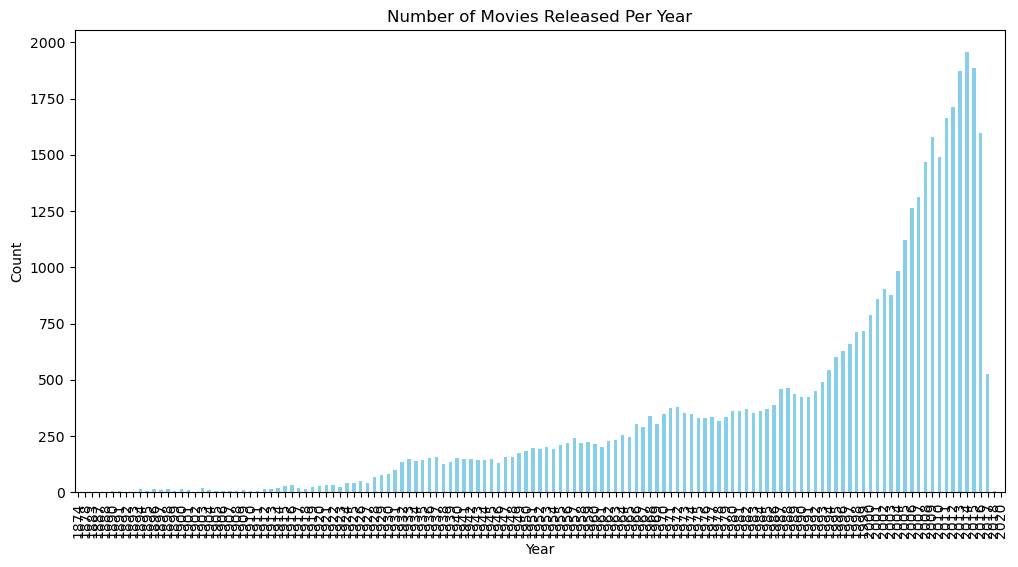

In [24]:
plt.figure(figsize=(12,6))
movies['year'].value_counts().sort_index().plot(kind='bar', color="skyblue")
plt.title("Number of Movies Released Per Year")
plt.xlabel("Year")
plt.ylabel("Count")
plt.show()

**Story** : Despite the explosion of movie production, **average ratings have stayed fairly stable**, with only small fluctuations. This suggests that producing more movies doesn’t necessarily dilute quality at the top level — but also that creating a masterpiece is still rare.

**Conclusion**: Ratings consistency means that **audience expectations remain stea. Platforms (like Netflix or Disney+) should focus on curated recommendations and highlighting hidden gems, since there is plenty of content but only some of it stands out.

### 3) Genre

In [26]:
# extracting the movies genres from the JSON strings
def extract_genres(x):
    try:
        genres = ast.literal_eval(x)
        return [g['name'] for g in genres]
    except:
        return []

movies['genre_list'] = movies['genres'].apply(extract_genres)
genre_counts = movies.explode('genre_list')['genre_list'].value_counts().head(10)
print(genre_counts)

genre_list
Drama              20202
Comedy             13094
Thriller            7609
Romance             6721
Action              6583
Horror              4668
Crime               4297
Documentary         3911
Adventure           3488
Science Fiction     3033
Name: count, dtype: int64


/tmp/ipykernel_8190/581570514.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=genre_counts.values, y=genre_counts.index, palette="mako")


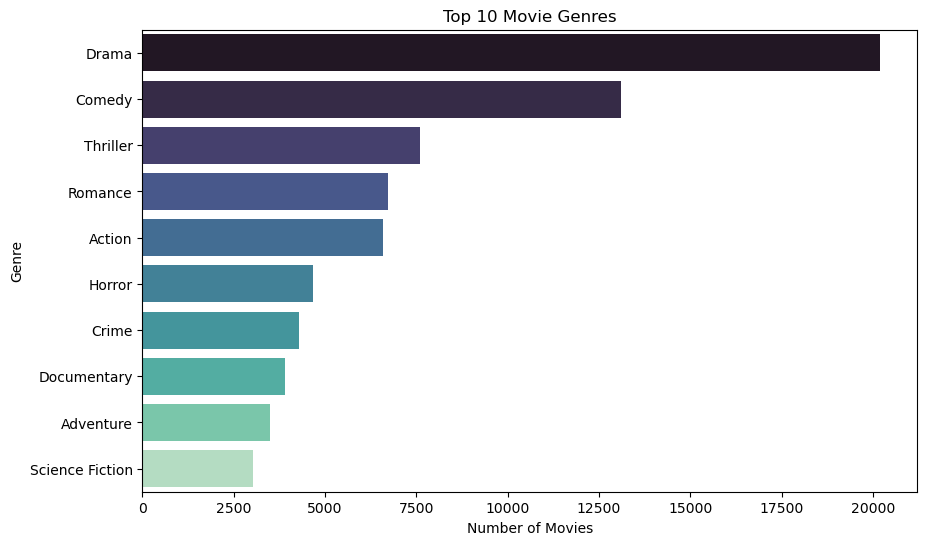

In [41]:
# visualization
plt.figure(figsize=(10,6))
sns.barplot(x=genre_counts.values, y=genre_counts.index, palette="mako")
plt.title("Top 10 Movie Genres")
plt.xlabel("Number of Movies")
plt.ylabel("Genre")
plt.show()